# Read dataset

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'crx.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

# Put txt files into DataFrame

In [2]:
arrange_data = []
for line in data:
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.columns = label

# processing with missimg value
df.replace('?', inplace=True)  # replace missing value with previous value

df=df.astype({'A2':'float32',
              'A3':'float32',
              'A8':'float32'})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Split training data & testing data

In [3]:
crx_data = df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
crx_label = df['A16']
train_data , test_data , train_label , test_label = train_test_split(crx_data, crx_label, test_size=0.33, stratify=crx_label)

# KNN (K = 5)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(train_data,train_label)
pred = knn.predict(test_data)
accuracy = knn.score(test_data, test_label, sample_weight=None)

# Confusion matrix

In [5]:
print(confusion_matrix(test_label, pred))

[[ 54  47]
 [ 22 105]]


# Prediction

In [6]:
print(classification_report(test_label, pred))
print("Accuracy: ", accuracy)

              precision    recall  f1-score   support

           +       0.71      0.53      0.61       101
           -       0.69      0.83      0.75       127

   micro avg       0.70      0.70      0.70       228
   macro avg       0.70      0.68      0.68       228
weighted avg       0.70      0.70      0.69       228

Accuracy:  0.6973684210526315


# Compare the accuracy with different values of K

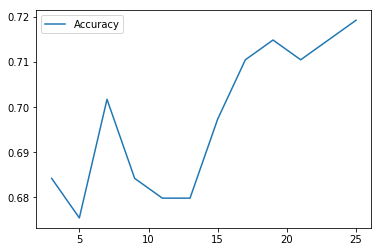

In [7]:
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
K_accuracy = []
for value in K_values:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(train_data,train_label)
    K_accuracy.append(knn.score(test_data, test_label, sample_weight=None))

plt.plot(K_values, K_accuracy, label="Accuracy")
plt.legend()
plt.show()